<a href="https://colab.research.google.com/github/MasterNathan01/4105/blob/main/WatersNathan_801283595_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

def nonlinear_model(inputs, coeff2, coeff1, bias):
    """Nonlinear model: coeff2 * inputs^2 + coeff1 * inputs + bias"""
    return coeff2 * inputs**2 + coeff1 * inputs + bias

def linear_model(inputs, weight, bias):
    """Linear model: weight * inputs + bias"""
    return weight * inputs + bias

def mean_squared_loss(predictions, targets):
    return ((predictions - targets) ** 2).mean()

def train_nonlinear_model(epochs, optimizer, parameters, train_inputs, val_inputs, train_targets, val_targets):
    for epoch in range(1, epochs + 1):

        predictions_train = nonlinear_model(train_inputs, *parameters)
        train_loss = mean_squared_loss(predictions_train, train_targets)

        with torch.no_grad():
            predictions_val = nonlinear_model(val_inputs, *parameters)
            val_loss = mean_squared_loss(predictions_val, val_targets)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Epoch {epoch}: Training Loss = {train_loss:.6f}, Validation Loss = {val_loss:.6f}')

    return parameters
def linear_model(input_data, slope, intercept):
    """Linear model: slope * x + intercept"""
    return slope * input_data + intercept

def train_linear_model(epochs, optimizer, parameters, train_inputs, val_inputs, train_targets, val_targets):
    """Training loop for linear model"""
    for epoch in range(1, epochs + 1):

        train_predictions = linear_model(train_inputs, *parameters)
        train_loss = compute_loss(train_predictions, train_targets)

        with torch.no_grad():
            val_predictions = linear_model(val_inputs, *parameters)
            val_loss = compute_loss(val_predictions, val_targets)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch:>4}: Train Loss = {train_loss:.6f}, Validation Loss = {val_loss:.6f}")

    return parameters

def train_linear_model(epochs, optimizer, parameters, train_inputs, val_inputs, train_targets, val_targets):
    for epoch in range(1, epochs + 1):

        predictions_train = linear_model(train_inputs, *parameters)
        train_loss = mean_squared_loss(predictions_train, train_targets)

        with torch.no_grad():
            predictions_val = linear_model(val_inputs, *parameters)
            val_loss = mean_squared_loss(predictions_val, val_targets)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Epoch {epoch}: Training Loss = {train_loss:.6f}, Validation Loss = {val_loss:.6f}')

    return parameters

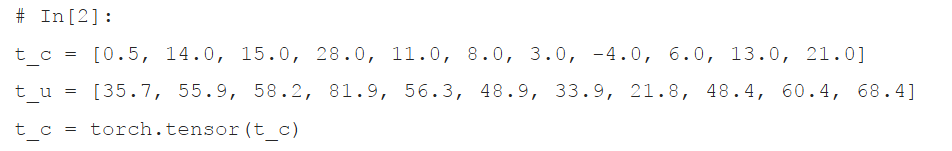

Training Non-linear Model
Nonlinear Model Training with SGD Optimizer

SGD Learning Rate = 0.1
Epoch 500: Training Loss = nan, Validation Loss = nan
Epoch 1000: Training Loss = nan, Validation Loss = nan
Epoch 1500: Training Loss = nan, Validation Loss = nan
Epoch 2000: Training Loss = nan, Validation Loss = nan
Epoch 2500: Training Loss = nan, Validation Loss = nan
Epoch 3000: Training Loss = nan, Validation Loss = nan
Epoch 3500: Training Loss = nan, Validation Loss = nan
Epoch 4000: Training Loss = nan, Validation Loss = nan
Epoch 4500: Training Loss = nan, Validation Loss = nan
Epoch 5000: Training Loss = nan, Validation Loss = nan
SGD Learning Rate = 0.01
Epoch 500: Training Loss = nan, Validation Loss = nan
Epoch 1000: Training Loss = nan, Validation Loss = nan
Epoch 1500: Training Loss = nan, Validation Loss = nan
Epoch 2000: Training Loss = nan, Validation Loss = nan
Epoch 2500: Training Loss = nan, Validation Loss = nan
Epoch 3000: Training Loss = nan, Validation Loss = nan
Ep

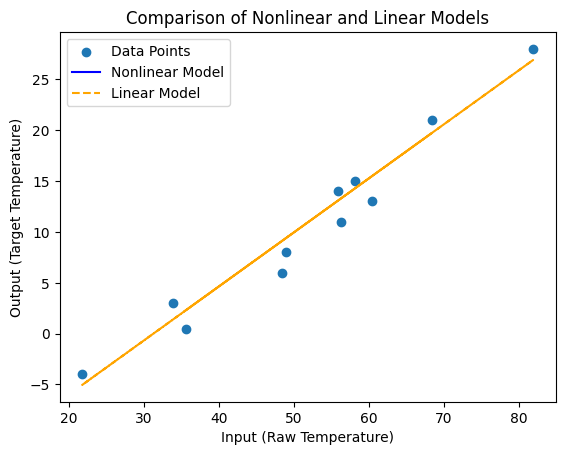

In [40]:
targets = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
inputs_raw = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

inputs_normalized = 0.1 * inputs_raw

num_samples = inputs_raw.shape[0]
num_val = int(0.2 * num_samples)
indices_shuffled = torch.randperm(num_samples)

train_indices = indices_shuffled[:-num_val]
val_indices = indices_shuffled[-num_val:]

train_inputs = inputs_normalized[train_indices]
train_targets = targets[train_indices]

val_inputs = inputs_normalized[val_indices]
val_targets = targets[val_indices]

learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5000

print("Training Non-linear Model")
print('Nonlinear Model Training with SGD Optimizer\n')
for lr in learning_rates:
    parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([parameters], lr=lr)
    print(f'SGD Learning Rate = {lr}')
    train_nonlinear_model(epochs=epochs, optimizer=optimizer, parameters=parameters, train_inputs=train_inputs, val_inputs=val_inputs, train_targets=train_targets, val_targets=val_targets)


print("\nTraining Linear Model")
for lr in learning_rates:
    parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.Adam([parameters], lr=lr)
    print(f'Adam Learning Rate = {lr}')
    train_nonlinear_model(epochs=epochs, optimizer=optimizer, parameters=parameters, train_inputs=train_inputs, val_inputs=val_inputs, train_targets=train_targets, val_targets=val_targets)

print('\nComparing Nonlinear and Linear Models\n')
best_lr = 0.01

nonlinear_parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
nonlinear_optimizer = optim.SGD([nonlinear_parameters], lr=best_lr)
trained_nonlinear_parameters = train_nonlinear_model(epochs, nonlinear_optimizer, nonlinear_parameters, train_inputs, val_inputs, train_targets, val_targets)

linear_parameters = torch.tensor([1.0, 0.0], requires_grad=True)
linear_optimizer = optim.SGD([linear_parameters], lr=best_lr)
trained_linear_parameters = train_linear_model(epochs, linear_optimizer, linear_parameters, train_inputs, val_inputs, train_targets, val_targets)

predictions_nonlinear = nonlinear_model(inputs_normalized, *trained_nonlinear_parameters).detach().numpy()
predictions_linear = linear_model(inputs_normalized, *trained_linear_parameters).detach().numpy()

plt.scatter(inputs_raw, targets, label='Data Points')
plt.plot(inputs_raw, predictions_nonlinear, label='Nonlinear Model', color='blue')
plt.plot(inputs_raw, predictions_linear, label='Linear Model', color='orange', linestyle='dashed')
plt.xlabel('Input (Raw Temperature)')
plt.ylabel('Output (Target Temperature)')
plt.title('Comparison of Nonlinear and Linear Models')
plt.legend()
plt.show()

In [50]:
import torch
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
data = pd.read_csv(url)
data.head()

def map_binary(x):
    return x.map({'yes': 1, 'no': 0})

binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[binary_columns] = data[binary_columns].apply(map_binary)
data.pop('furnishingstatus')
data.head()

scaler = StandardScaler()
columns_to_scale = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = data.pop('price')
features = data[input_features].values
features = torch.tensor(features, dtype=torch.float32)
target = torch.tensor(target.values, dtype=torch.float32).reshape(-1, 1)

num_samples = features.shape[0]
num_val = int(0.2 * num_samples)

indices = torch.randperm(num_samples)

train_indices = indices[:-num_val]
val_indices = indices[-num_val:]

train_features = features[train_indices]
train_target = target[train_indices]
val_features = features[val_indices]
val_target = target[val_indices]

def linear_model(x, w0, w1, w2, w3, w4, w5):
    return w0 + x[:, 0]*w1 + x[:, 1]*w2 + x[:, 2]*w3 + x[:, 3]*w4 + x[:, 4]*w5

def calculate_loss(predictions, actual):
    squared_diff = (predictions - actual)**2
    return squared_diff.mean()

def train_model(epochs, optimizer, params, train_x, train_y, val_x, val_y):
    for epoch in range(1, epochs + 1):
        train_predictions = linear_model(train_x, *params)
        train_loss = calculate_loss(train_predictions, train_y)

        val_predictions = linear_model(val_x, *params)
        val_loss = calculate_loss(val_predictions, val_y)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")

    return params

initial_params = torch.tensor([1.0, 0.0, 0.0, 0.0, 0.0, 0.0], requires_grad=True)

learning_rates = [0.1, 0.01, 0.001, 0.0001]

for rate in learning_rates:
    params = torch.tensor([1.0, 0.0, 0.0, 0.0, 0.0, 0.0], requires_grad=True)
    sgd_optimizer = optim.SGD([params], lr=rate)
    print("Learning Rate:", rate)
    train_model(
        epochs=5000,
        optimizer=sgd_optimizer,
        params=params,
        train_x=train_features,
        train_y=train_target,
        val_x=val_features,
        val_y=val_target
    )
    print(" ")

    params = torch.tensor([1.0, 0.0, 0.0, 0.0, 0.0, 0.0], requires_grad=True)
    adam_optimizer = optim.Adam([params], lr=rate)
    print("Learning Rate:", rate)
    train_model(
        epochs=5000,
        optimizer=adam_optimizer,
        params=params,
        train_x=train_features,
        train_y=train_target,
        val_x=val_features,
        val_y=val_target
    )
    print(" ")


Learning Rate: 0.1
Epoch 500, Training loss 0.9730, Validation loss 1.1083
Epoch 1000, Training loss 0.9730, Validation loss 1.1083
Epoch 1500, Training loss 0.9730, Validation loss 1.1083
Epoch 2000, Training loss 0.9730, Validation loss 1.1083
Epoch 2500, Training loss 0.9730, Validation loss 1.1083
Epoch 3000, Training loss 0.9730, Validation loss 1.1083
Epoch 3500, Training loss 0.9730, Validation loss 1.1083
Epoch 4000, Training loss 0.9730, Validation loss 1.1083
Epoch 4500, Training loss 0.9730, Validation loss 1.1083
Epoch 5000, Training loss 0.9730, Validation loss 1.1083
 
Learning Rate: 0.1
Epoch 500, Training loss 0.9730, Validation loss 1.1083
Epoch 1000, Training loss 0.9730, Validation loss 1.1083
Epoch 1500, Training loss 0.9730, Validation loss 1.1083
Epoch 2000, Training loss 0.9730, Validation loss 1.1083
Epoch 2500, Training loss 0.9730, Validation loss 1.1083
Epoch 3000, Training loss 0.9730, Validation loss 1.1083
Epoch 3500, Training loss 0.9730, Validation loss 

In [51]:
import torch
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
data = pd.read_csv(url)
data.head()

def map_binary(x):
    return x.map({'yes': 1, 'no': 0})

binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[binary_columns] = data[binary_columns].apply(map_binary)
data.pop('furnishingstatus')
data.head()

scaler = StandardScaler()
columns_to_scale = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
target = data.pop('price')
features = data[input_features].values
features = torch.tensor(features, dtype=torch.float32)
target = torch.tensor(target.values, dtype=torch.float32).reshape(-1, 1)

num_samples = features.shape[0]
num_val = int(0.2 * num_samples)

indices = torch.randperm(num_samples)

train_indices = indices[:-num_val]
val_indices = indices[-num_val:]

train_features = features[train_indices]
train_target = target[train_indices]
val_features = features[val_indices]
val_target = target[val_indices]

def linear_model(x, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10):
    return w0 + x[:, 0]*w1 + x[:, 1]*w2 + x[:, 2]*w3 + x[:, 3]*w4 + x[:, 4]*w5 + x[:, 5]*w6 + x[:, 6]*w7 + x[:, 7]*w8 + x[:, 8]*w9 + x[:, 9]*w10

def calculate_loss(predictions, actual):
    squared_diff = (predictions - actual)**2
    return squared_diff.mean()

def train_model(epochs, optimizer, params, train_x, train_y, val_x, val_y):
    for epoch in range(1, epochs + 1):
        train_predictions = linear_model(train_x, *params)
        train_loss = calculate_loss(train_predictions, train_y)

        val_predictions = linear_model(val_x, *params)
        val_loss = calculate_loss(val_predictions, val_y)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")

    return params

initial_params = torch.tensor([1.0] * 11, requires_grad=True)

learning_rates = [0.1, 0.01, 0.001, 0.0001]

for rate in learning_rates:
    params = torch.tensor([1.0] * 11, requires_grad=True)
    sgd_optimizer = optim.SGD([params], lr=rate)
    print("Learning Rate:", rate)
    train_model(
        epochs=5000,
        optimizer=sgd_optimizer,
        params=params,
        train_x=train_features,
        train_y=train_target,
        val_x=val_features,
        val_y=val_target
    )
    print(" ")

    params = torch.tensor([1.0] * 11, requires_grad=True)
    adam_optimizer = optim.Adam([params], lr=rate)
    print("Learning Rate:", rate)
    train_model(
        epochs=5000,
        optimizer=adam_optimizer,
        params=params,
        train_x=train_features,
        train_y=train_target,
        val_x=val_features,
        val_y=val_target
    )
    print(" ")


Learning Rate: 0.1
Epoch 500, Training loss 1.0755, Validation loss 0.7020
Epoch 1000, Training loss 1.0755, Validation loss 0.7020
Epoch 1500, Training loss 1.0755, Validation loss 0.7020
Epoch 2000, Training loss 1.0755, Validation loss 0.7020
Epoch 2500, Training loss 1.0755, Validation loss 0.7020
Epoch 3000, Training loss 1.0755, Validation loss 0.7020
Epoch 3500, Training loss 1.0755, Validation loss 0.7020
Epoch 4000, Training loss 1.0755, Validation loss 0.7020
Epoch 4500, Training loss 1.0755, Validation loss 0.7020
Epoch 5000, Training loss 1.0755, Validation loss 0.7020
 
Learning Rate: 0.1
Epoch 500, Training loss 1.0755, Validation loss 0.7020
Epoch 1000, Training loss 1.0755, Validation loss 0.7020
Epoch 1500, Training loss 1.0755, Validation loss 0.7020
Epoch 2000, Training loss 1.0755, Validation loss 0.7020
Epoch 2500, Training loss 1.0755, Validation loss 0.7020
Epoch 3000, Training loss 1.0755, Validation loss 0.7020
Epoch 3500, Training loss 1.0755, Validation loss 